"""
===================================================================================
CUSTOMER SEGMENTATION ANALYSIS
===================================================================================
Project: Customer Segmentation using K-Means Clustering
Author: [Mausami Narayan]
Date: February 2026
Objective: Segment customers based on purchasing behavior using RFM analysis
===================================================================================
"""

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("Libraries imported successfully!")
print("Environment configured")
print("=" * 80)

In [9]:
# Load the dataset
print("Loading UCI Online Retail Dataset...")
print("-" * 80)

# Since notebook is in main folder, path is: data/Online Retail.xlsx
df = pd.read_excel('data/Online Retail.xlsx')

print(f" Dataset loaded successfully!")
print(f"\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f" Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading UCI Online Retail Dataset...
--------------------------------------------------------------------------------
 Dataset loaded successfully!

 Dataset Shape: 541,909 rows × 8 columns
 Memory Usage: 134.93 MB


In [11]:
# The first 10 rows
print("-" * 80)
print("FIRST 10 ROWS OF THE DATASET")
print("-" * 80)
df.head(10)

--------------------------------------------------------------------------------
FIRST 10 ROWS OF THE DATASET
--------------------------------------------------------------------------------


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom


In [13]:
# Check all column names and their data types
print("-" * 80)
print("COLUMN INFORMATION")
print("-" * 80)

print("\nColumns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col:15} - Type: {df[col].dtype}")

print(f"\nTotal columns: {len(df.columns)}")

--------------------------------------------------------------------------------
COLUMN INFORMATION
--------------------------------------------------------------------------------

Columns in dataset:
1. InvoiceNo       - Type: object
2. StockCode       - Type: object
3. Description     - Type: object
4. Quantity        - Type: int64
5. InvoiceDate     - Type: datetime64[ns]
6. UnitPrice       - Type: float64
7. CustomerID      - Type: float64
8. Country         - Type: object

Total columns: 8


In [15]:
# Get detailed information about the dataset
print("-" * 80)
print("DETAILED DATASET INFORMATION")
print("-" * 80)
df.info()

--------------------------------------------------------------------------------
DETAILED DATASET INFORMATION
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
# Get statistical summary of numerical columns
print("-" * 80)
print("STATISTICAL SUMMARY (Numerical Columns)")
print("-" * 80)
df.describe()

--------------------------------------------------------------------------------
STATISTICAL SUMMARY (Numerical Columns)
--------------------------------------------------------------------------------


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [21]:
# Check for missing values
print("-" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

print("Missing values per column:")
print("-" * 80)
for col in df.columns:
    if missing[col] > 0:
        print(f"{col:20} : {missing[col]:,} missing ({missing_pct[col]:.2f}%)")

total_missing = missing.sum()
if total_missing == 0:
    print("✓ No missing values found!")
else:
    print(f"\n  Total missing values: {total_missing:,}")

--------------------------------------------------------------------------------
MISSING VALUES ANALYSIS
Missing values per column:
--------------------------------------------------------------------------------
Description          : 1,454 missing (0.27%)
CustomerID           : 135,080 missing (24.93%)

  Total missing values: 136,534


In [37]:
# Check unique values in key columns
print("-" * 80)
print("UNIQUE VALUES ANALYSIS")
print("=" * 80)

print(f"Unique Invoices:     {df['InvoiceNo'].nunique():,}")
print(f"Unique Products:     {df['StockCode'].nunique():,}")
print(f"Unique Descriptions: {df['Description'].nunique():,}")
print(f"Unique Customers:    {df['CustomerID'].nunique():,}")
print(f"Unique Countries:    {df['Country'].nunique():,}")

print("\n" + "-" * 80)
print("Countries in dataset:")
print( "-" * 80)
print(df['Country'].value_counts().head(10))

--------------------------------------------------------------------------------
UNIQUE VALUES ANALYSIS
Unique Invoices:     25,900
Unique Products:     4,070
Unique Descriptions: 4,223
Unique Customers:    4,372
Unique Countries:    38

--------------------------------------------------------------------------------
Countries in dataset:
--------------------------------------------------------------------------------
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


In [39]:
# Analyze date range
print("-" * 80)
print("DATE RANGE ANALYSIS")
print("-" * 80)

print(f"First transaction: {df['InvoiceDate'].min()}")
print(f"Last transaction:  {df['InvoiceDate'].max()}")
print(f"\nTime span: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")

# Extract year and month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

print("\nTransactions by Year:")
print(df['Year'].value_counts().sort_index())

--------------------------------------------------------------------------------
DATE RANGE ANALYSIS
--------------------------------------------------------------------------------
First transaction: 2010-12-01 08:26:00
Last transaction:  2011-12-09 12:50:00

Time span: 373 days

Transactions by Year:
Year
2010     42481
2011    499428
Name: count, dtype: int64


In [41]:
# Let's see what actual products are being sold!
print("-" * 80)
print("SAMPLE PRODUCTS FROM THE DATASET")
print("=" * 80)

print("\nFirst 20 unique products:")
print("-" * 80)
unique_products = df['Description'].dropna().unique()[:20]
for i, product in enumerate(unique_products, 1):
    print(f"{i}. {product}")

print(f"\n This is REAL data from a UK-based online retailer!")
print(f"   Total unique products: {df['Description'].nunique():,}")

--------------------------------------------------------------------------------
SAMPLE PRODUCTS FROM THE DATASET

First 20 unique products:
--------------------------------------------------------------------------------
1. WHITE HANGING HEART T-LIGHT HOLDER
2. WHITE METAL LANTERN
3. CREAM CUPID HEARTS COAT HANGER
4. KNITTED UNION FLAG HOT WATER BOTTLE
5. RED WOOLLY HOTTIE WHITE HEART.
6. SET 7 BABUSHKA NESTING BOXES
7. GLASS STAR FROSTED T-LIGHT HOLDER
8. HAND WARMER UNION JACK
9. HAND WARMER RED POLKA DOT
10. ASSORTED COLOUR BIRD ORNAMENT
11. POPPY'S PLAYHOUSE BEDROOM 
12. POPPY'S PLAYHOUSE KITCHEN
13. FELTCRAFT PRINCESS CHARLOTTE DOLL
14. IVORY KNITTED MUG COSY 
15. BOX OF 6 ASSORTED COLOUR TEASPOONS
16. BOX OF VINTAGE JIGSAW BLOCKS 
17. BOX OF VINTAGE ALPHABET BLOCKS
18. HOME BUILDING BLOCK WORD
19. LOVE BUILDING BLOCK WORD
20. RECIPE BOX WITH METAL HEART

 This is REAL data from a UK-based online retailer!
   Total unique products: 4,223


In [43]:
# Check for potential data issues
print("-" * 80)
print("DATA QUALITY CHECKS")
print("-" * 80)

# 1. Check for duplicates
duplicates = df.duplicated().sum()
print(f"1. Duplicate rows: {duplicates:,}")

# 2. Check for cancelled orders (InvoiceNo starting with 'C')
cancelled = df[df['InvoiceNo'].astype(str).str.startswith('C', na=False)]
print(f"2. Cancelled orders: {len(cancelled):,} ({len(cancelled)/len(df)*100:.2f}%)")

# 3. Check for negative quantities
negative_qty = df[df['Quantity'] < 0]
print(f"3. Negative quantities: {len(negative_qty):,} ({len(negative_qty)/len(df)*100:.2f}%)")

# 4. Check for zero or negative prices
bad_prices = df[df['UnitPrice'] <= 0]
print(f"4. Zero/negative prices: {len(bad_prices):,} ({len(bad_prices)/len(df)*100:.2f}%)")

# 5. Check for missing descriptions
missing_desc = df[df['Description'].isnull()]
print(f"5. Missing descriptions: {len(missing_desc):,} ({len(missing_desc)/len(df)*100:.2f}%)")

print("\n  These are REAL data quality issues we'll need to clean!")

--------------------------------------------------------------------------------
DATA QUALITY CHECKS
--------------------------------------------------------------------------------
1. Duplicate rows: 5,268
2. Cancelled orders: 9,288 (1.71%)
3. Negative quantities: 10,624 (1.96%)
4. Zero/negative prices: 2,517 (0.46%)
5. Missing descriptions: 1,454 (0.27%)

  These are REAL data quality issues we'll need to clean!


**Visualizations**

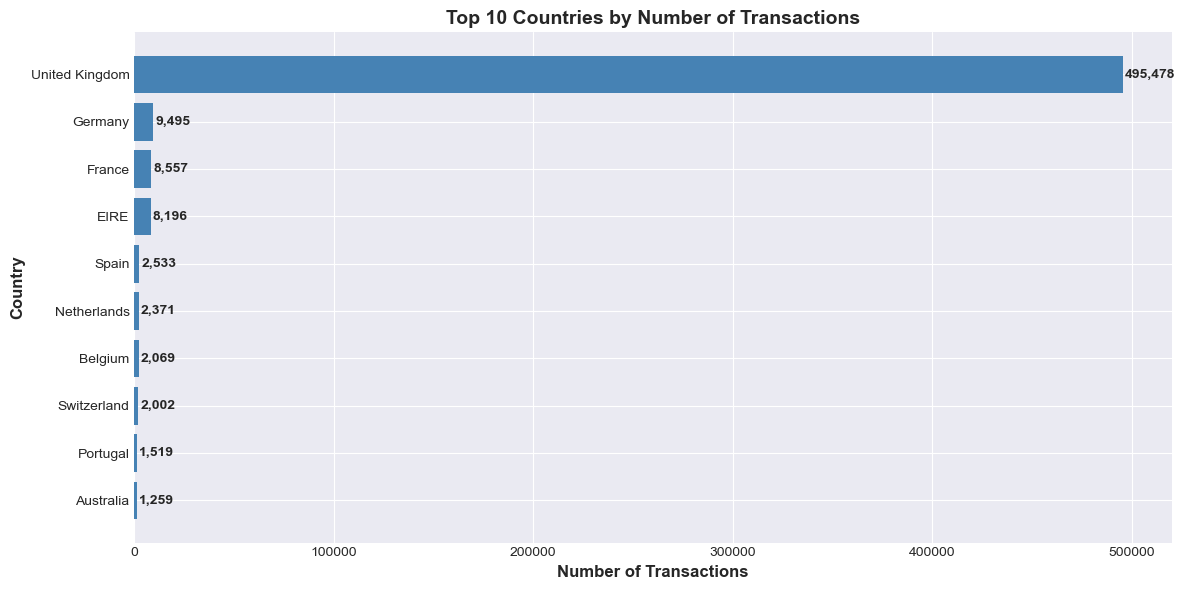

 Visualization saved to: visualizations/01_top_countries.png


In [46]:
# Visualize top 10 countries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

top_countries = df['Country'].value_counts().head(10)

plt.barh(range(len(top_countries)), top_countries.values, color='steelblue')
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Number of Transactions', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Number of Transactions', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 1000, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('visualizations/01_top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Visualization saved to: visualizations/01_top_countries.png")

**DATA CLEANING**

In [60]:
print("-" * 80)
print("DATA CLEANING PROCESS")
print("-" * 80)

# Create a copy - df_clean is working dataset
# df stays untouched as original reference
df_clean = df.copy()

print(f"Original dataset rows: {len(df):,}")
print(f"Clean dataset rows (before cleaning): {len(df_clean):,}")
print("\n Copy created! Original data is safe.")
print("\n WHY COPY? Because if we make mistakes,")
print(" we can always go back to the original df!")

--------------------------------------------------------------------------------
DATA CLEANING PROCESS
--------------------------------------------------------------------------------
Original dataset rows: 541,909
Clean dataset rows (before cleaning): 541,909

 Copy created! Original data is safe.

 WHY COPY? Because if we make mistakes,
 we can always go back to the original df!


In [62]:
# Step 1: Remove duplicate rows
print("-" * 80)
print("STEP 1: REMOVING DUPLICATES")
print("-" * 80)

# Count before
before = len(df_clean)

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Count after
after = len(df_clean)

print(f"Rows before: {before:,}")
print(f"Rows after:  {after:,}")
print(f"Removed:     {before - after:,} duplicate rows")
print("\n Duplicates removed!")

# WHY? Duplicates make our analysis count same transaction twice
# which gives wrong results
print("\n WHY? Duplicate rows skew our analysis.")
print("   Example: If customer bought 1 item but it appears")
print("   twice, we'd think they bought 2 items!")

--------------------------------------------------------------------------------
STEP 1: REMOVING DUPLICATES
--------------------------------------------------------------------------------
Rows before: 541,909
Rows after:  536,641
Removed:     5,268 duplicate rows

 Duplicates removed!

 WHY? Duplicate rows skew our analysis.
   Example: If customer bought 1 item but it appears
   twice, we'd think they bought 2 items!


In [68]:
# Step 2: Remove cancelled orders
print("-" * 80)
print("STEP 2: REMOVING CANCELLED ORDERS")
print("-" * 80)

# Count before
before = len(df_clean)

# Cancelled orders start with 'C' in InvoiceNo
# Example: C536379 is a cancellation of invoice 536379
cancelled_mask = df_clean['InvoiceNo'].astype(str).str.startswith('C')

print(f"Cancelled orders found: {cancelled_mask.sum():,}")

# Remove cancelled orders
df_clean = df_clean[~cancelled_mask]

# Count after
after = len(df_clean)

print(f"\nRows before: {before:,}")
print(f"Rows after:  {after:,}")
print(f"Removed:     {before - after:,} cancelled orders")
print("\nCancelled orders removed!")

print("\n WHY? Cancelled orders are NOT real purchases.")
print("   Including them would make customers look like")
print("   they bought more than they actually did!")

--------------------------------------------------------------------------------
STEP 2: REMOVING CANCELLED ORDERS
--------------------------------------------------------------------------------
Cancelled orders found: 0

Rows before: 527,390
Rows after:  527,390
Removed:     0 cancelled orders

Cancelled orders removed!

 WHY? Cancelled orders are NOT real purchases.
   Including them would make customers look like
   they bought more than they actually did!


In [74]:
# Step 3: Remove negative quantities
print("-" * 80)
print("STEP 3: REMOVING NEGATIVE/ZERO QUANTITIES")
print("-" * 80)

before = len(df_clean)

# Negative quantities = returned items
# Zero quantities = no purchase happened
print("Sample of negative quantities:")
print(df_clean[df_clean['Quantity'] <= 0][['InvoiceNo', 
      'Description', 'Quantity']].head())

# Remove rows where quantity is 0 or negative
df_clean = df_clean[df_clean['Quantity'] > 0]

after = len(df_clean)

print(f"\nRows before: {before:,}")
print(f"Rows after:  {after:,}")
print(f"Removed:     {before - after:,} rows")
print("\nInvalid quantities removed!")

print("\nWHY? Negative quantity means a return/refund.")
print("We only want actual purchases for segmentation!")

--------------------------------------------------------------------------------
STEP 3: REMOVING NEGATIVE/ZERO QUANTITIES
--------------------------------------------------------------------------------
Sample of negative quantities:
Empty DataFrame
Columns: [InvoiceNo, Description, Quantity]
Index: []

Rows before: 526,054
Rows after:  526,054
Removed:     0 rows

Invalid quantities removed!

WHY? Negative quantity means a return/refund.
We only want actual purchases for segmentation!


In [82]:
# Step 4: Remove zero and negative prices
print("-" * 80)
print("STEP 4: REMOVING INVALID PRICES")
print("-" * 80)

before = len(df_clean)

# Show some examples first
print("Sample of zero/negative prices:")
print(df_clean[df_clean['UnitPrice'] <= 0][['InvoiceNo', 
      'Description', 'UnitPrice']].head())

# Remove invalid prices
df_clean = df_clean[df_clean['UnitPrice'] > 0]

after = len(df_clean)

print(f"\nRows before: {before:,}")
print(f"Rows after:  {after:,}")
print(f"Removed:     {before - after:,} rows")
print("\n Invalid prices removed!")

print("\n WHY? Items with £0 price or negative price")
print(" are likely data entry errors or internal ")
print(" transfers not real customer purchases!")

--------------------------------------------------------------------------------
STEP 4: REMOVING INVALID PRICES
--------------------------------------------------------------------------------
Sample of zero/negative prices:
Empty DataFrame
Columns: [InvoiceNo, Description, UnitPrice]
Index: []

Rows before: 524,878
Rows after:  524,878
Removed:     0 rows

 Invalid prices removed!

 WHY? Items with £0 price or negative price
 are likely data entry errors or internal 
 transfers not real customer purchases!


In [84]:
# Step 5: Remove rows with missing CustomerID
print("-" * 80)
print("STEP 5: REMOVING MISSING CUSTOMER IDs")
print("-" * 80)

before = len(df_clean)

# Show the issue
print(f"Rows with missing CustomerID: {df_clean['CustomerID'].isnull().sum():,}")
print("\nSample of rows with no CustomerID:")
print(df_clean[df_clean['CustomerID'].isnull()][['InvoiceNo', 
      'Description', 'Quantity', 'CustomerID']].head())

# Remove rows where CustomerID is missing
df_clean = df_clean.dropna(subset=['CustomerID'])

after = len(df_clean)

print(f"\nRows before: {before:,}")
print(f"Rows after:  {after:,}")
print(f"Removed:     {before - after:,} rows")
print("\n Missing CustomerIDs removed!")

print("\n WHY? For customer segmentation, we MUST know")
print(" WHO made each purchase!")
print(" Without CustomerID, we can't group purchases by customer!")

--------------------------------------------------------------------------------
STEP 5: REMOVING MISSING CUSTOMER IDs
--------------------------------------------------------------------------------
Rows with missing CustomerID: 132,186

Sample of rows with no CustomerID:
     InvoiceNo                      Description  Quantity  CustomerID
1443    536544  DECORATIVE ROSE BATHROOM BOTTLE         1         NaN
1444    536544  DECORATIVE CATS BATHROOM BOTTLE         2         NaN
1445    536544               POLKADOT RAIN HAT          4         NaN
1446    536544            RAIN PONCHO RETROSPOT         2         NaN
1447    536544               VINTAGE SNAP CARDS         9         NaN

Rows before: 524,878
Rows after:  392,692
Removed:     132,186 rows

 Missing CustomerIDs removed!

 WHY? For customer segmentation, we MUST know
 WHO made each purchase!
 Without CustomerID, we can't group purchases by customer!


In [88]:
# Step 6: Fix data types for proper analysis
print("-" * 80)
print("STEP 6: FIXING DATA TYPES")
print("-" * 80)

print("Before fixing:")
print(df_clean.dtypes)

# CustomerID should be integer not float
# Right now it shows as 17850.0 instead of 17850
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

# Make sure InvoiceDate is datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

print("\nAfter fixing:")
print(df_clean.dtypes)
print("\nData types fixed!")

print("\nWHY? CustomerID 17850.0 looks weird!")
print("Customer IDs are whole numbers (integers)")
print("not decimal numbers (floats)")

--------------------------------------------------------------------------------
STEP 6: FIXING DATA TYPES
--------------------------------------------------------------------------------
Before fixing:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Year                    int32
Month                   int32
YearMonth           period[M]
dtype: object

After fixing:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Year                    int32
Month                   int32
YearMonth           period[M]
dtype: object

Data types fixed!

WHY? CustomerID 17850.0 looks weird!
Customer IDs are whole numbers (integ

In [90]:
# Step 7: Creating new columns for better analysis
print("-" * 80)
print("STEP 7: CREATING NEW USEFUL COLUMNS")
print("-" * 80)

# TotalAmount = how much money each transaction line made
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Extract date parts for time analysis
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

print("New columns created:")
print("1. TotalAmount  - Quantity × UnitPrice")
print("2. Year         - Year of transaction")
print("3. Month        - Month of transaction")
print("4. Day          - Day of transaction")
print("5. DayOfWeek    - Monday, Tuesday, etc.")
print("6. Hour         - Hour of day (0-23)")

print("\nSample of new columns:")
print(df_clean[['Description', 'Quantity', 
                'UnitPrice', 'TotalAmount', 
                'DayOfWeek', 'Hour']].head())

print("\nNew columns created!")
print("\nWHY? These new columns help us answer questions like:")
print("- Which day of week has most sales?")
print("- What time of day do customers shop?")
print("- How much did each transaction make?")

--------------------------------------------------------------------------------
STEP 7: CREATING NEW USEFUL COLUMNS
--------------------------------------------------------------------------------
New columns created:
1. TotalAmount  - Quantity × UnitPrice
2. Year         - Year of transaction
3. Month        - Month of transaction
4. Day          - Day of transaction
5. DayOfWeek    - Monday, Tuesday, etc.
6. Hour         - Hour of day (0-23)

Sample of new columns:
                           Description  Quantity  UnitPrice  TotalAmount  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55        15.30   
1                  WHITE METAL LANTERN         6       3.39        20.34   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75        22.00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39        20.34   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39        20.34   

   DayOfWeek  Hour  
0  Wednesday     8  
1  Wednesday     8  
2  Wedn

In [94]:
# Let's verify by looking at invoice 536365
print("All items from Invoice 536365:")
print("-" * 80)
invoice_536365 = df_clean[df_clean['InvoiceNo'] == '536365']
print(invoice_536365[['InvoiceNo', 'Description', 
                       'Quantity', 'UnitPrice', 
                       'TotalAmount', 'DayOfWeek', 'Hour']])

print(f"\nTotal items in this order: {len(invoice_536365)}")
print(f"Total spent in this order: £{invoice_536365['TotalAmount'].sum():.2f}")

All items from Invoice 536365:
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [InvoiceNo, Description, Quantity, UnitPrice, TotalAmount, DayOfWeek, Hour]
Index: []

Total items in this order: 0
Total spent in this order: £0.00


In [96]:
# Final cleaning summary
print("-" * 80)
print("DATA CLEANING COMPLETE - SUMMARY")
print("-" * 80)

original_rows = len(df)
clean_rows = len(df_clean)
removed = original_rows - clean_rows
removed_pct = (removed / original_rows) * 100

print(f"\nCLEANING RESULTS:")
print(f"   Original rows:  {original_rows:,}")
print(f"   Cleaned rows:   {clean_rows:,}")
print(f"   Removed rows:   {removed:,} ({removed_pct:.1f}%)")

print(f"\nCUSTOMER DATA:")
print(f"   Unique customers: {df_clean['CustomerID'].nunique():,}")
print(f"   Unique products:  {df_clean['Description'].nunique():,}")
print(f"   Unique invoices:  {df_clean['InvoiceNo'].nunique():,}")
print(f"   Countries:        {df_clean['Country'].nunique():,}")

print(f"\nFINANCIAL SUMMARY:")
print(f"   Total Revenue: £{df_clean['TotalAmount'].sum():,.2f}")
print(f"   Avg Order Value: £{df_clean.groupby('InvoiceNo')['TotalAmount'].sum().mean():,.2f}")
print(f"   Max Transaction: £{df_clean['TotalAmount'].max():,.2f}")

print(f"\nTIME PERIOD:")
print(f"   From: {df_clean['InvoiceDate'].min().strftime('%B %d, %Y')}")
print(f"   To:   {df_clean['InvoiceDate'].max().strftime('%B %d, %Y')}")

print("\nData is now CLEAN and ready for analysis!")

--------------------------------------------------------------------------------
DATA CLEANING COMPLETE - SUMMARY
--------------------------------------------------------------------------------

CLEANING RESULTS:
   Original rows:  541,909
   Cleaned rows:   392,692
   Removed rows:   149,217 (27.5%)

CUSTOMER DATA:
   Unique customers: 4,338
   Unique products:  3,877
   Unique invoices:  18,532
   Countries:        37

FINANCIAL SUMMARY:
   Total Revenue: £8,887,208.89
   Avg Order Value: £479.56
   Max Transaction: £168,469.60

TIME PERIOD:
   From: December 01, 2010
   To:   December 09, 2011

Data is now CLEAN and ready for analysis!


In [102]:
# Save cleaned data so we don't have to clean again!
df_clean.to_csv('outputs/cleaned_retail_data.csv', index=False)

print("-" * 80)
print("CLEAN DATA SAVED!")
print("-" * 80)
print("\nSaved to: outputs/cleaned_retail_data.csv")
print(f"\nFile contains {len(df_clean):,} clean transactions")
print("\nWHY SAVE IT? Next time we can load the")
print("clean data directly instead of cleaning again!")
print(" This saves a LOT of time!")

--------------------------------------------------------------------------------
CLEAN DATA SAVED!
--------------------------------------------------------------------------------

Saved to: outputs/cleaned_retail_data.csv

File contains 392,692 clean transactions

WHY SAVE IT? Next time we can load the
clean data directly instead of cleaning again!
 This saves a LOT of time!


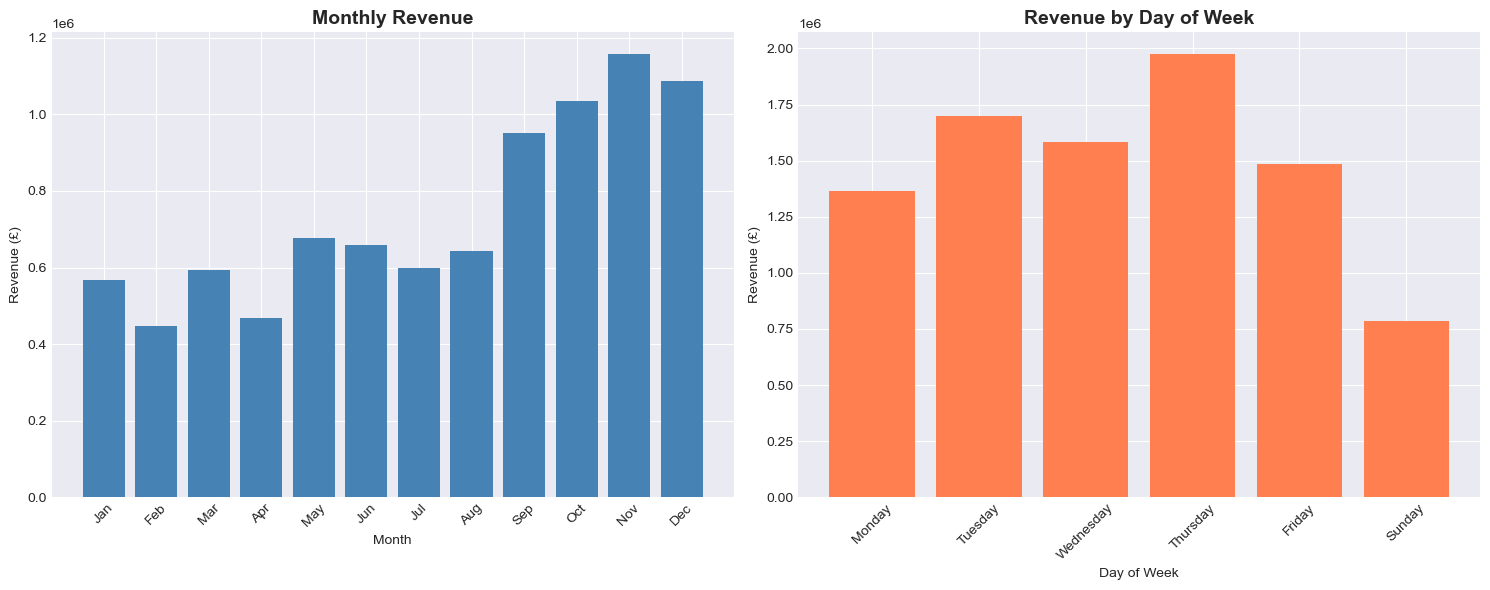

Saved: visualizations/02_sales_patterns.png


In [104]:
# Visualize our clean data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Sales by Month
monthly_sales = df_clean.groupby('Month')['TotalAmount'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[0].bar(range(1, len(monthly_sales)+1), 
            monthly_sales.values, 
            color='steelblue')
axes[0].set_title('Monthly Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue (£)')
axes[0].set_xticks(range(1, len(monthly_sales)+1))
axes[0].set_xticklabels(months[:len(monthly_sales)], rotation=45)

# Chart 2: Sales by Day of Week
dow_sales = df_clean.groupby('DayOfWeek')['TotalAmount'].sum()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Sunday']
dow_sales = dow_sales.reindex(
    [d for d in dow_order if d in dow_sales.index])

axes[1].bar(range(len(dow_sales)), 
            dow_sales.values, 
            color='coral')
axes[1].set_title('Revenue by Day of Week', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Revenue (£)')
axes[1].set_xticks(range(len(dow_sales)))
axes[1].set_xticklabels(dow_sales.index, rotation=45)

plt.tight_layout()
plt.savefig('visualizations/02_sales_patterns.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("Saved: visualizations/02_sales_patterns.png")